# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

### Problem Statement
The new era of e-news (electronic news) has provided readers with an opportunity to get quicker access to news and what is happening around the world much faster. The information that is provided to users is gathered through a variety of methods and software as compared to traditional print. There are also multiple advantages to transmitting news electronically as it enables users to various features such as audio, video and other interactive elements that are unavailable in conventional news formats.

With this context, E-news Express an online news portal aims to expand its business by acquiring new subscribers. The company wants to analyse the actions of every user who visits their app to understand user preferences and interests and determine how to drive better engagement. The company has seen a decline in new monthly subscribers compared to the past year. The company wants to understand if the reason for this decline is due to the existing webpage design not being done well enough interms of the outline and recommended content to keep customers engaged for long enough.

### Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group).
The project requires us to perform data and statistical analysis to answer the below questions of interest to the company.

1.Do the users spend more time on the new landing page than on the existing landing page?

2.Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3.Does the converted status depend on the preferred language?

4.Is the time spent on the new page the same for the different language users?


## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Reading the Data into a DataFrame

In [2]:
#loading the dataset
df = pd.read_csv('C:/Users/samyu/Documents/PGP - DSBA/Business Statistics/Week 2/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [5]:
#read the first five rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [6]:
#read last five rows of the dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [7]:
#understanding the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [8]:
df.shape

(100, 6)

In [11]:
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [13]:
#checking for missing values in the data
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [15]:
#checking for duplicates in the dataset
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

### Univariate Analysis

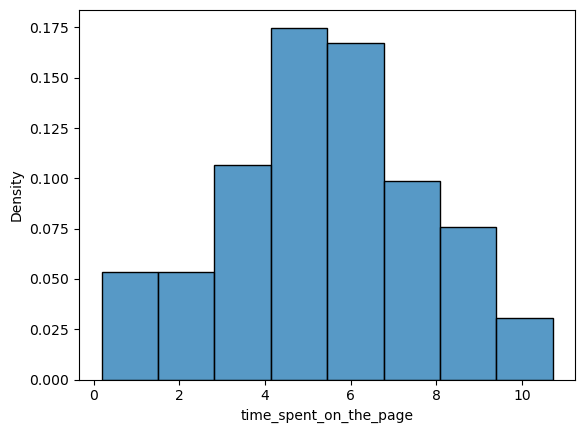

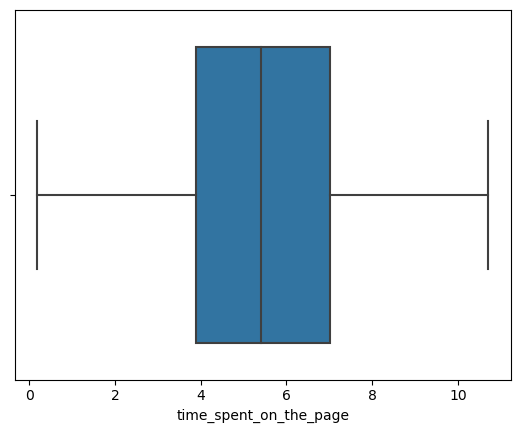

In [16]:
# Time spent on the page
sns.histplot(data=df,x='time_spent_on_the_page',stat ='density')
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

for most users,the Median time spend on page seems to be around 5.5 minutes

In [17]:
#Analysis for Group
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

There are two groups namely treatment and control and each group has 50 users in them

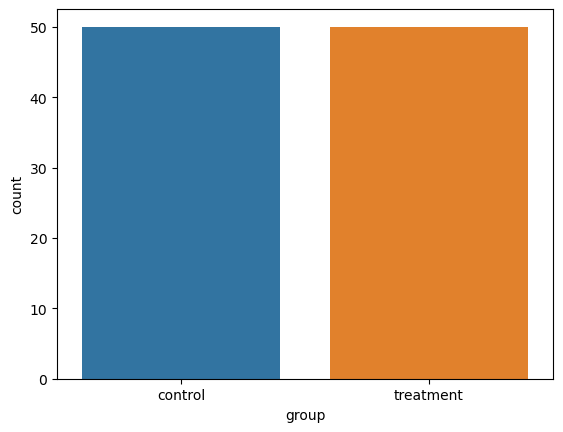

In [19]:
sns.countplot(data=df,x='group')
plt.show()

In [20]:
#Analysis for Landing Page
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

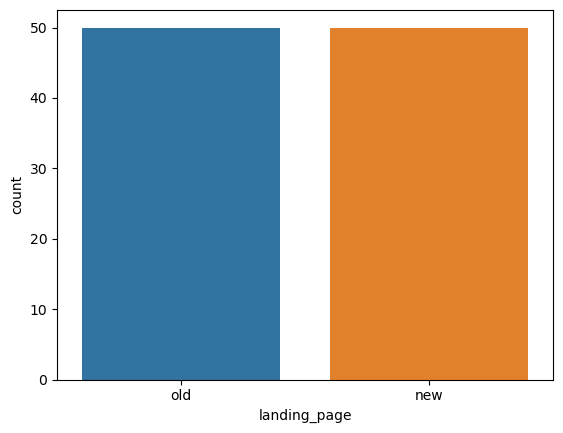

In [21]:
sns.countplot(data=df,x='landing_page')
plt.show()

In [22]:
#Analysis for converted
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

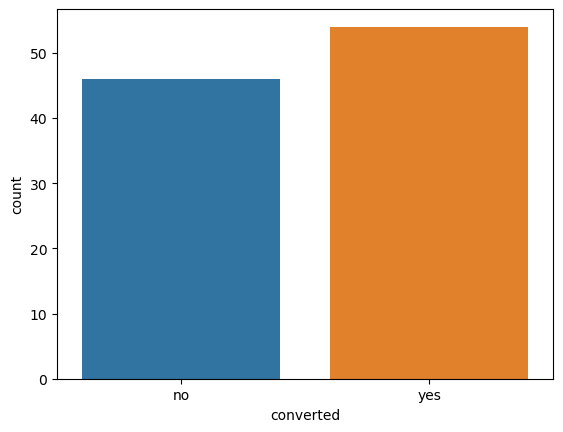

In [23]:
sns.countplot(data=df,x='converted')
plt.show()

out of 100 users in total 54 users got converted into subscribers from the landing page

In [24]:
#Analysis for language preferred
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

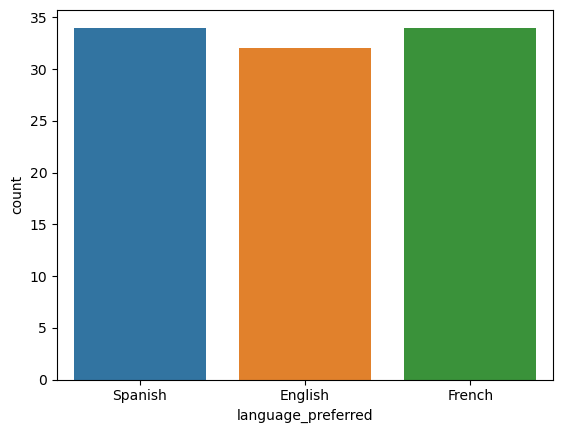

In [25]:
sns.countplot(data=df,x='language_preferred')
plt.show()

### Bivariate Analysis

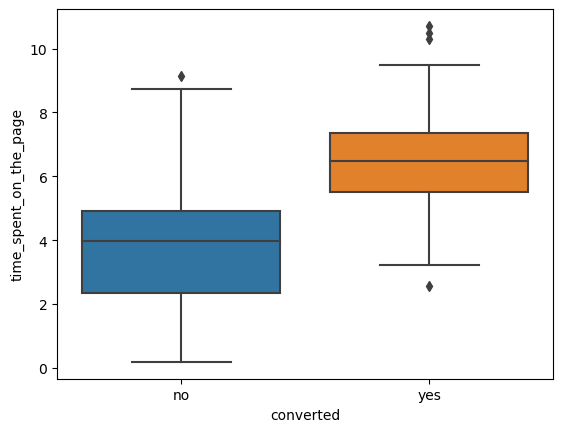

In [28]:
#Analysis of Conversion rate vs Time spent on the page
sns.boxplot(data = df, x = 'converted', y ='time_spent_on_the_page')
plt.show()

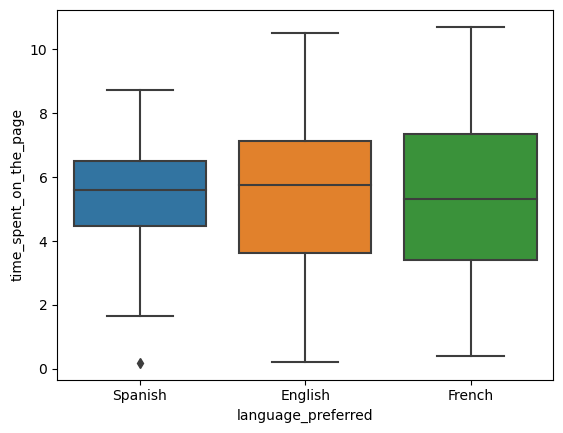

In [29]:
#Analysis of Language preferred vs Time spent on the page
sns.boxplot(data = df, x = 'language_preferred', y ='time_spent_on_the_page')
plt.show()

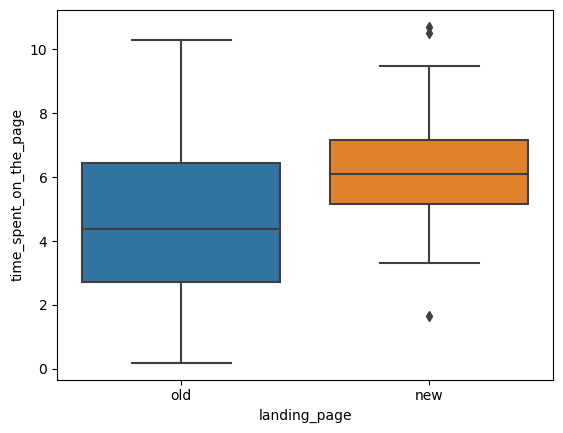

In [30]:
#Analysis of landing page vs Time spent on the page
sns.boxplot(data = df, x = 'landing_page', y ='time_spent_on_the_page')
plt.show()

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

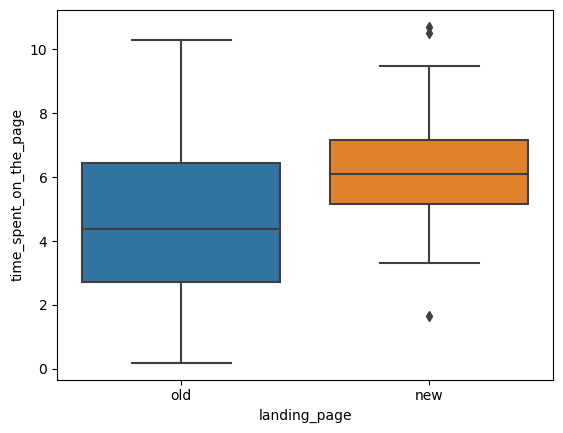

In [31]:
#visual graph to compare time spent on new page and old landing page
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

from the above graph , we can see that the users have spent more time on the new landing page

### Step 1: Define the null and alternate hypotheses

Null Hypotheses - Time spent on new landing page is the same as the old landing page
Alternate Hypotheses - Time spent on the new landing page is more than the time spent on the old landing page

### Step 2: Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. The population standard deviations are unknown. hence we select the t test for this problem statement.

### Step 3: Decide the significance level

We choose the level of significance to be 0.05

### Step 4: Collect and prepare data

In [32]:
# creating a subset of data frame for new landing page users 
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# creating a subset of data frame for old landing page users
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page'] ##Complete the code

In [34]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the old page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the old page is: 2.58


We see that the sample standard deviation of the time spent on the new and old page are different. Hence we can assume that the population standard deviations are also different

### Step 5: Calculate the p-value

In [35]:
#import the required function
from scipy.stats import ttest_ind
# find the p-value
test_stat, p_value = ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater')
print('The p-value is', p_value)

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [36]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'We can see that the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'We can see that the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

We can see that the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

We can see from the above hypothesis test that the p value is 0.0001 which is less than the level of significance. we have enough evidence to claim that the time spent on new landing page is more than the time spent on old landing page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

## Visual Analysis

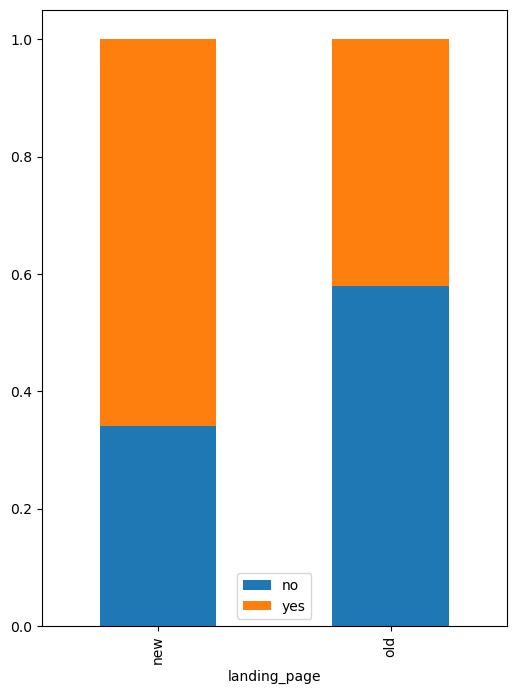

In [38]:
#creating a visual graph to compare landing page vs conversion rate
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.show()

### Defining the Null and Alternate Hypothesis

Null Hypothesis : Conversion for the new page is the same as conversion for the old page
Alternate Hypothesis : Conversion for the new page is greater than the conversion for the old page

### Select Appropriate Test

Since this is a one tailed test of two population proportions from two independent populations, we select the z test.

### Significance Level

As given in the problem statement , we select the level of significance to be 0.05

### Collect and Prepare data

In [39]:
# calculate the number of converted users in the treatment group
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
# calculate the number of converted users in the control group
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes'] # complete your code here

n_control = df.group.value_counts()['control'] # total number of users in the control group
n_treatment = df.group.value_counts()['treatment'] # total number of users in the treatment group

print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


In [41]:
#pvalue

# complete the code to import the required function
from statsmodels.stats.proportion import proportions_ztest  

# write the code to calculate the p-value
test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative = 'larger')   #complete the code by filling appropriate parameters in the blanks


print('The p-value is', p_value)

The p-value is 0.008026308204056278


In [42]:
#comparing the p value with level of significance
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


#### conclusion
since the p value is lower than the level of significance, we reject the null hypothesis and conclude that the proportion of users getting converted is higher when they visit the new landing page as opposed to the old landing page

## 3. Is the conversion and preferred language are independent or related?

### Visual Analysis

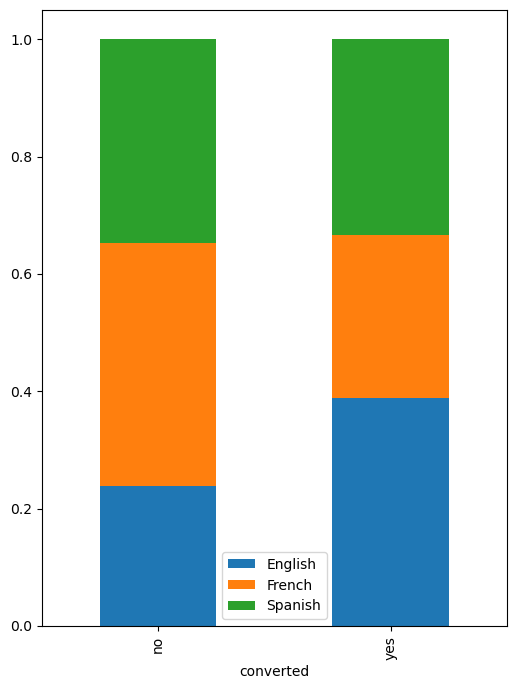

In [43]:
pd.crosstab(df['converted'],df['language_preferred'],normalize='index').plot(kind="bar", figsize=(6,8), stacked=True)
plt.legend()
plt.show()

### Defining Null and Alternate Hypothesis
Null Hypothesis: The conversion and preferred language are independent of each other
Alternate Hypothesis: The conversion and preferred language are dependent on each other

### Selecting the Appropriate test
This is a problem of the test of independence, concerning two categorical variables - converted status and preferred language. Hence we choose the chi-square test of independence.

### Level of Significance
we choose the level of significance at 0.05

In [44]:
#creating a contingency table
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])  
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


In [45]:
#p value
from scipy.stats import chi2_contingency  
chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table) 

print('The p-value is', p_value)

The p-value is 0.21298887487543447


In [46]:
#comparing p value with significance level
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


we accept the null hypothesis and conclude that conversion rate and language are independent of one another

## 4. Is the time spent on the new page same for the different language users?

In [48]:
# create a new DataFrame for users who got served the new page
df_new = df[df['landing_page'] == 'new']

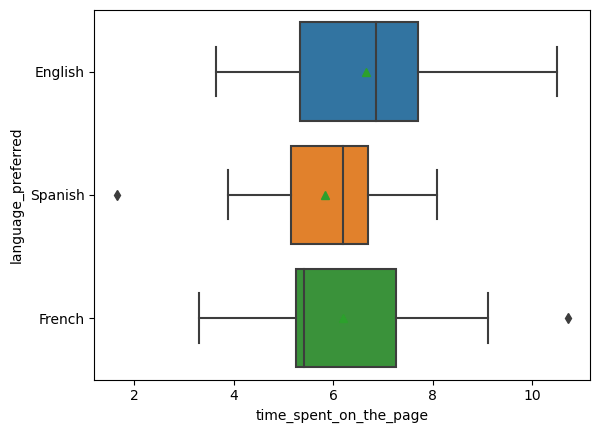

In [49]:
sns.boxplot(x = 'time_spent_on_the_page', y = 'language_preferred', showmeans = True, data = df_new)
plt.show()

In [50]:
#mean time spent on the new page for different language users
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

#defining the null and alternate hypotheses
Null Hypothesis - Time spent on the new page is the same for different language users
Alternate Hypothesis - Time spent on the new page is different for the different language users

In [51]:
#we choose the significance level at 0.05
#creating subsets of the data frame for three different language preferences
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
time_spent_French = df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page']  
time_spent_Spanish = df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page']

In [52]:
#pvalue calculation
from scipy.stats import f_oneway
test_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)
print('The p-value is', p_value)

The p-value is 0.43204138694325955


In [53]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


therefore we conclude by stating that the average time spent on the new page is different for different languages

## Conclusion and Business Recommendations

In our project , the objective was to check whether the new landing page is able to bring in more conversion rates and new subscribers .
We performed A/B testing by dividing the sample data set as control and treatment for the same and performed necessary hypothesis tests to conclude that
1. Time spent on new landing page is more than the time spent on old landing page. 
2.The number of users who become subscribers is higher when they visit the new landing page.This may be attributed to better features on the new landing page, more user friendly and user interface being faster with more relevant content from around the globe faster.
3. Language and conversion rate are independent of one another
4. The average time spent on the new page is different for different languages.The language of the news has no effect on the conversion rate which implies that conversion rate is purely attributed to better features on the app. However time spent on the app varies by language.

___